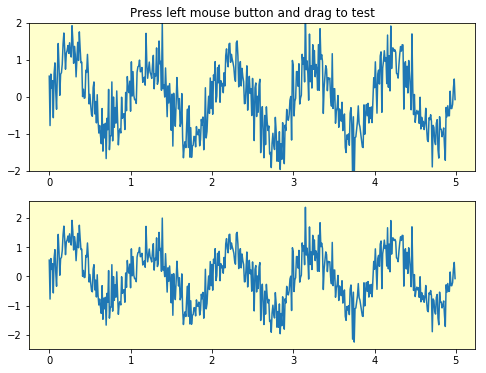

In [4]:
"""
The SpanSelector is a mouse widget to select a xmin/xmax range and plot the
detail view of the selected region in the lower axes
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(211, facecolor='#FFFFCC')

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2*np.pi*x) + 0.5*np.random.randn(len(x))

ax.plot(x, y, '-')
ax.set_ylim(-2, 2)
ax.set_title('Press left mouse button and drag to test')

ax2 = fig.add_subplot(212, facecolor='#FFFFCC')
line2 = ax2.plot(x, y, '-')


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    thisx = x[indmin:indmax]
    thisy = y[indmin:indmax]
    line2.set_data(thisx, thisy)
    ax2.set_xlim(thisx[0], thisx[-1])
    ax2.set_ylim(thisy.min(), thisy.max())
    fig.canvas.draw()

# set useblit True on gtkagg for enhanced performance
span = SpanSelector(ax, onselect, 'horizontal', useblit=True,
                    rectprops=dict(alpha=0.5, facecolor='red'))


# plt.show()